<a href="https://colab.research.google.com/github/erickgt00/MLMCD/blob/main/Tarea_5_EG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 5

## Método Mean Shift

El método de Mean Shift es una técnica de clustering no paramétrico utilizado en machine learning para agrupar datos similares juntos.

* El método de Mean Shift se basa en la idea de encontrar las regiones de alta densidad de puntos en el espacio de características de los datos.

* El proceso comienza con una ventana de búsqueda (o kernel) centrada en un punto de datos. Luego, se calcula el centroide de la ventana de búsqueda, que es el punto medio ponderado de los datos dentro de la ventana.

* La ventana de búsqueda se mueve hacia el centroide calculado, y se repite el proceso de cálculo del centroide y el desplazamiento de la ventana hasta que se alcanza un máximo local de densidad.

* Cada punto de datos se asigna al máximo local de densidad más cercano, y los puntos que convergen a un mismo máximo local se agrupan juntos.

* El resultado final del algoritmo es un conjunto de centroides, cada uno representando un grupo de puntos similares.

* El método de Mean Shift es eficaz para encontrar los centros de los grupos en datos con formas irregulares o no lineales, y puede manejar conjuntos de datos grandes y de alta dimensionalidad. Sin embargo, puede ser computacionalmente costoso y sensible a la elección del tamaño de la ventana de búsqueda y la función de kernel utilizada.

# Aprendizaje No Supervisado

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [22]:
import warnings

warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("train.csv")

Utilizamos unicamente variables de interes

In [24]:
df = df[['Loan Amount','Term','Interest Rate','Grade','Loan Status']]
df.head

<bound method NDFrame.head of        Loan Amount  Term  Interest Rate  Grade  Loan Status
0            10000    59      11.135007      2            0
1             3609    59      12.237563      3            0
2            28276    59      12.545884      6            0
3            11170    59      16.731201      3            0
4            16890    59      15.008300      3            0
...            ...   ...            ...    ...          ...
67458        13601    59       9.408858      3            1
67459         8323    59       9.972104      3            0
67460        15897    59      19.650943      1            0
67461        16567    59      13.169095      4            0
67462        15353    59      16.034631      2            0

[67463 rows x 5 columns]>

In [25]:
X = df

y = df['Loan Status']

## Feature Scalling

In [26]:
cols = df.columns

In [27]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df = ms.fit_transform(df)

In [28]:
X = pd.DataFrame(df, columns=[cols])

In [29]:
X.head()

,Loan Amount,Term,Interest Rate,Grade,Loan Status
0,0.264403,1.0,0.265983,0.166667,0.0
1,0.076355,1.0,0.316414,0.333333,0.0
2,0.802154,1.0,0.330517,0.833333,0.0
3,0.298829,1.0,0.521957,0.333333,0.0
4,0.467134,1.0,0.443150,0.333333,0.0


## Metodo del Codo para encontrar el mejor numero de clusters

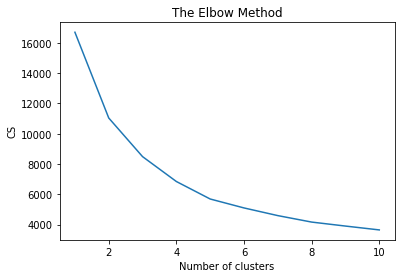

In [30]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Al parecer la mayor distancia se encuentra entre 4 y 5, se hará la prueba para ambas y asi ver el rendimiento.

## Análisis de modelo

In [31]:
 kmeans.cluster_centers_ 

array([[ 2.57573538e-01,  9.85888898e-01,  2.98646774e-01,
         6.50397537e-01, -1.56819002e-15],
       [ 4.12634579e-01,  9.86157919e-01,  5.54296776e-01,
         2.26869617e-01, -3.88578059e-16],
       [ 2.88262380e-01,  9.86946762e-01,  3.04395859e-01,
         3.16545080e-01,  1.00000000e+00],
       [ 8.40676910e-01,  9.84702541e-01,  2.98271097e-01,
         1.88921034e-01,  1.59594560e-15],
       [ 4.57145152e-01, -1.99840144e-15,  3.17698399e-01,
         3.03719008e-01,  1.02617080e-01],
       [ 7.10607197e-01,  9.84847964e-01,  2.92054899e-01,
         3.01094409e-01,  1.00000000e+00],
       [ 4.81974188e-01,  9.84080986e-01,  2.13888439e-01,
         3.80656825e-01,  1.51267887e-15],
       [ 4.93320063e-01,  9.84939734e-01,  2.19183990e-01,
         9.47301773e-02,  3.21964677e-15],
       [ 7.37445191e-01,  9.86745967e-01,  3.06196000e-01,
         6.49366519e-01, -6.14786000e-15],
       [ 1.83030204e-01,  9.84932338e-01,  2.54960569e-01,
         1.87678001e-01

In [32]:
kmeans.inertia_

3643.2734485415704

**K-means con 4 clusters**

In [36]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# Vamos a observar cuantas muestras estan bien etiquetadas
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Resultado: %d de %d muestras estan bien etiquetadas." % (correct_labels, y.size))
print('Precisión: {0:0.2f}'. format(correct_labels/float(y.size)))

Resultado: 27310 de 67463 muestras estan bien etiquetadas.
Precisión: 0.40


**K-means con 5 clusters**

In [37]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# Vamos a observar cuantas muestras estan bien etiquetadas
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Resultado: %d de %d muestras estan bien etiquetadas." % (correct_labels, y.size))
print('Precisión: {0:0.2f}'. format(correct_labels/float(y.size)))

Resultado: 19772 de 67463 muestras estan bien etiquetadas.
Precisión: 0.29


**K-means con 6 clusters**

In [38]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

# Vamos a observar cuantas muestras estan bien etiquetadas
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Resultado: %d de %d muestras estan bien etiquetadas." % (correct_labels, y.size))
print('Precisión: {0:0.2f}'. format(correct_labels/float(y.size)))

Resultado: 25461 de 67463 muestras estan bien etiquetadas.
Precisión: 0.38


De lo anterior podemos concluir que la mejor cantidad de clusters son 4 siendo este con una presición del 40%.